# Introduction to Digital Control

## Purpose of this Section

To describe the basic tools for the design of a control system to be
implemented using a computer or microcomputer.

**Contents**

-   Typical architecture

-   Relationship between $s$ and $z$

-   Continuous design followed by Discretization

-   Direct digital design

## Typical Architecture of a Digital Control System

![Digital control system](pictures/digicon.png)

## Relationship between $s$ and $z$ 

We have already seen that (see [Section 6.3](../3/cse))

$$\begin{equation}z=e^{sT}\end{equation}$$ 

and 

$$\begin{equation}
	s=\frac{1}{T}\ln z
\end{equation}$$

We can use Equation (1) to define a mapping between the $s$ and $z$ planes as summarised below.

### Mapping between between s and z

Since $z=e^{sT}$ we can define a 'mapping' from the $s$-plane to the $z$-plane. Various properties of the $z$-plane follow.

-   s-plane stability boundary $s=j\omega$ maps to the unit circle in the z-plane:

$$|z|=1$$ 



-   Maximum frequency is half the sampling frequency $\omega_s/2$ (a consequence of Nyquist's sampling theorem) and is mapped to the negative real axis in the z-plane.

For proofs, see the problems in the self-directed learning exercises.

### Stability in the z-plane

-   Because the stability boundary is a unit circle, Routh-Hurwitz and
    Nyquist stability tests no longer work.

-   The Jury test is a similar test to the Routh-Hurwitz test but it is
    more involved.

-   The design curves for constant natural frequency $\omega_n$, damping
    ratio $\zeta$, $\sigma_d$ and $\omega_d$ are also distorted by the
    mapping.

### z-plane Design Curves

Use the Matlab function `zgrid` to see the mapping.

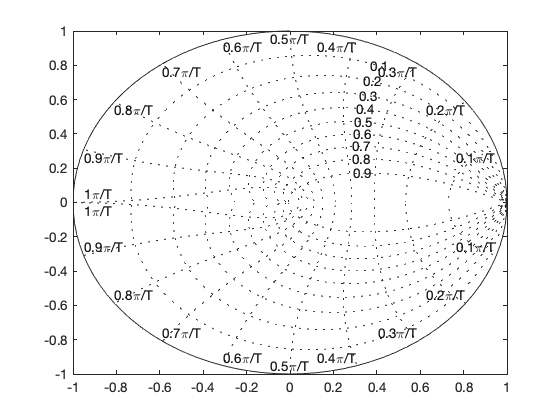

In [17]:
zgrid

## Continuous Design 

Assumption -- we have designed a compensator using root-locus or frequency response and now need to implement it with digital hardware, e.g. a digital micro-controller or digital signal processor (DSP).

We will recall the **discretization** methods discussed in the [last section](../3/cse), give a comparison of their frequency response behaviour and the applicability of the continuous design approach. We conclude with an example.

### Discretization Procedure

![Digitization](pictures/digitization.png)

The idea is that given a continuous compensator transfer function $D(s)$ we need to find the best equivalent $D(z)$. As illustrated in , there is no exact solution since the whole time history is available to $D(s)$ whereas only  samples are available to $D(z)$ so different discretization approximation methods make different assumptions about what happens to $e(t)$ between sampling instants.

### Discretization with MATLAB

Given a continuous $D(s)$ find best equivalent $D(z)$.

Take a transfer function (here $D(s)=p/(s+p)$) and return an equivalent
$D(z)$

In [18]:
p = 5; % rad/s
ds = tf([p], [1 p])


ds =
 
    5
  -----
  s + 5
 
Continuous-time transfer function.



In [19]:
Fs = (20*p)/(2*pi); % Hz
Ts = 1/Fs;

To discretize $D(s)$ we use

```matlab
dz = c2d(ds, Ts, method)
```

 ### Summary of Discretization Methods
 
 
 | **Method**                    | **Transform**                     |  **c2d method** |
 |-------------------------------|-----------------------------------|-----------------|
 | Zero-order hold               | $$(1-z^{-1})\mathcal{Z}(D(s)/s)$$   |  `'zoh'` |
 | Tustin (bilinear transform)   | $$s = (2/T)(1-z^{-1})/(1+z^{-1})$$  |  `'tustin'` |
 | Matched pole-zero             | map poles/zeros using $z=e^{sT}$    | `'matched'` |
 | First-order hold              | See Matlab documentation            | `'foh'` |
 | Impulse-invariant             | See Matlab documentation            | `'imp'` |
 | Tustin with pre-warp          | See Matlab documentation            | `'prewarp'` |

For example, for *Zero-Order-Hold Equivalent*

In [20]:
dz = c2d(ds, Ts, 'zoh')


dz =
 
    0.2696
  ----------
  z - 0.7304
 
Sample time: 0.062832 seconds
Discrete-time transfer function.



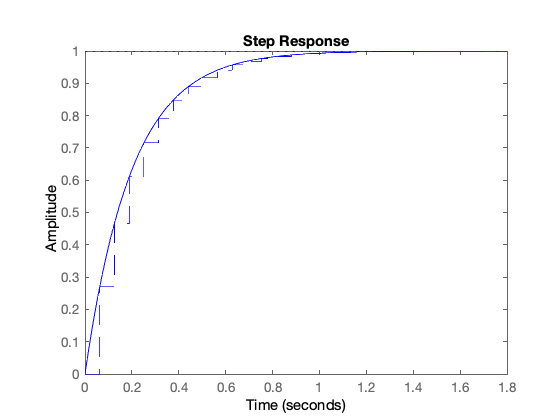

In [21]:
step(ds,'-',dz,'--')

See [Section 6.3](../3/cse) for mathematical derivations.

### Comparison of approximations

You can run this example yourself by downloading and executing the script [comparison.m](matlab/comparison).

#### Compare digital equivalents

First plot continuous frequency response.


ds =
 
    5
  -----
  s + 5
 
Continuous-time transfer function.



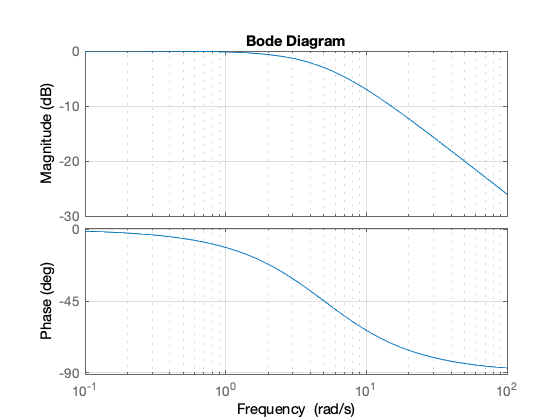

In [22]:
ds = tf(5, [1 5])
bode(ds)
grid

Run comparison for $f_s = 15$ Hz.

In [23]:
Fs = 15;
Ts = 1/Fs;

##### Hold equivalent

In [24]:
dsz=c2d(ds, Ts, 'zoh')


dsz =
 
    0.2835
  ----------
  z - 0.7165
 
Sample time: 0.066667 seconds
Discrete-time transfer function.



##### Tustin equivalent

In [25]:
dst = c2d(ds, Ts, 'tustin')


dst =
 
  0.1429 z + 0.1429
  -----------------
     z - 0.7143
 
Sample time: 0.066667 seconds
Discrete-time transfer function.



##### Matched pole-zero

In [26]:
dsm = c2d(ds, Ts, 'mpz')


dsm =
 
    0.2835
  ----------
  z - 0.7165
 
Sample time: 0.066667 seconds
Discrete-time transfer function.



#### Make Bode plot

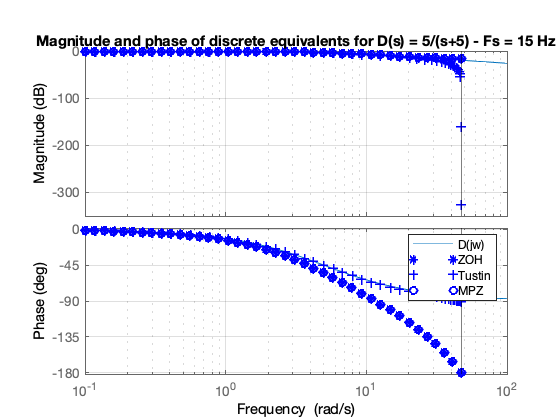

In [27]:
bode(ds,dsz,'*',dst,'+',dsm,'o')
grid
legend('D(jw)','ZOH','Tustin','MPZ')
title('Magnitude and phase of discrete equivalents for D(s) = 5/(s+5) - Fs = 15 Hz')

Repeat comparison for  $f_𝑠=5$ Hz.

In [28]:
Fs = 5;
Ts = 1/Fs;

##### Hold equivalent

In [29]:
dsz=c2d(ds, Ts, 'zoh')


dsz =
 
    0.6321
  ----------
  z - 0.3679
 
Sample time: 0.2 seconds
Discrete-time transfer function.



##### Tustin equivalent

In [30]:
dst = c2d(ds, Ts, 'tustin')


dst =
 
  0.3333 z + 0.3333
  -----------------
     z - 0.3333
 
Sample time: 0.2 seconds
Discrete-time transfer function.



##### Matched pole-zero

In [31]:
dsm = c2d(ds, Ts, 'mpz')


dsm =
 
    0.6321
  ----------
  z - 0.3679
 
Sample time: 0.2 seconds
Discrete-time transfer function.



#### Make Bode plot

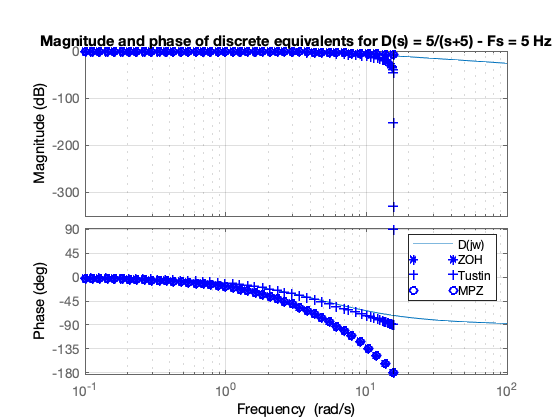

In [32]:
bode(ds,dsz,'*',dst,'+',dsm,'o')
grid
legend('D(jw)','ZOH','Tustin','MPZ')
title('Magnitude and phase of discrete equivalents for D(s) = 5/(s+5) - Fs = 5 Hz')

You should note that the approximations are good for frequencies below about $\omega_s/4$. If $\omega_s$ is sufficiently high, then break frequencies are accurately reproduced. MPZ and Tustin show a notch at $\omega_s/2$
because of the zero term at $1+z^{-1}$. Apart from the large difference at $\omega_s/2$, which is typically outside the working frequency, all methods have similar performance. Since MPZ is easier to calculate by hand, it is often to be preferred. However, if you have access to MATLAB and the control system toolbox function *c2d*, there is no need to use anything other than ZOH (which is the default) or the Tustin method.

### Design Example

#### Plan for classroom session

In the session we will:

-   design a continous compensator for a plant and discretize it by MPZ method
-   see how the digital compensator would be implemented
-   discuss the limitations of "continuous design"
-   redesign the compensator using a digital-design approach.

Let us consider the lead compensation of the double integrator system
shown below. 

#### Design Example

![Figure 1](pictures/ex1-1.png)

Let us further assume that we want to have the dominant closed-loop poles with ideal damping $\zeta=1/\sqrt{2}$ and natural frequency $\omega_n = 2\sqrt{2}$ rad/s. Furthermore, let us assume that the zero will be placed at $s=-1$ so that the compensator $D(s) = K(s+1)/(s+p)$. 

The root-locus design parameters will then be obtained from the pole-zero map shown below.

#### Root Locus Design Parameters

![Figure 2](pictures/ex1-2.png)

$$\theta_z = \tan^{-1} 2/1 = 116.57^\circ$$

$$\begin{aligned}
    -\theta_p + 116.57 -270 = & -180 \\
    -\theta_p = & -180 - 153.43 \\
    \theta_p = & 26.57^\circ\end{aligned}$$

$$\begin{aligned}
    -\tan 26.57 = & \frac{2}{x} \\
    x  = & 2/\tan 26.57 = 4 \\
    p = & -6\end{aligned}$$

To calculate the gain, we need to know that $l_1=2\sqrt{2}$, $l_2=\sqrt{5}$, $l_3=\sqrt{20}$.

$$K = \frac{(2\sqrt{2})^2\times \sqrt{20}}{\sqrt{5}} = \frac{8\times 2\sqrt{5}}{\sqrt{5}} = 16.$$

$$D(s) = \frac{16(s+1)}{(s+6)}.$$

To convert to $D(z)$ let the sampling frequency $\omega_s=20\times \omega_n = 40\sqrt{2}=56.67$ rad/s. Thus
$f_s=\omega_s/2\pi = 9$ Hz so sampling period $T = 1/f_s \approx 0.1$ s.

Let's pretend that we are solving this problem in a context where we only have a calculator so we'll use matched-pole zero.

$$D(z)=k\frac{1-e^{-aT}z^{-1}}{1-e^{-bT}z^{-1}}$$

where $k$ is determined by matching the DC gain of the two compensators. For the continuous compensator 

$$\left.$D(s)\right|_{s=0} = 16/6.$$ 

For the digital compensator 

$$D(z)|_{z=1} = k(1-e^{-aT})/(1-e^{-bT}),$$

so

$$k=\frac{16}{6}\times\frac{1-e^{-bT}}{1-e^{-aT}}$$

For our design, $T=0.1$, $a=1$ and $b=6$ so $$\begin{aligned}
    k = & \frac{16}{6}\times\frac{1-e^{-0.6}}{1-e^{-0.1}} \\
    = & \frac{16}{6}\times\frac{1-0.5488}{1-0.9048} = \frac{16}{6}\times\frac{0.4512}{0.0952}  \\
    k  = & 12.64\end{aligned}$$

So $$D(z) = \frac{12.64(1-0.9048z^{-1})}{(1-0.5488z^{-1})}.$$

#### Implementation of design

Since 

$D(z)=U(z)/E(z)$ then 

$$\begin{aligned}
	(1-0.5488z^{-1})U(z) = & 12.64(1-0.9048z^{-1})E(z) \\
	U(z) - 0.5488z^{-1}U(z) = & 12.64 E(z) - 11.44 z^{-1} E(z) \\
	U(z) = & 0.5488z^{-1}U(z) + 12.64 E(z) - 11.44 z^{-1} E(z)\end{aligned}$$

Converting this into (sampled) time domain

$$u(n) = 0.5488 u(n-1) + 12.64 e(n) - 11.44 e(n-1)$$

#### Implementation of design - pseudocode

We could implement this in pseudo code:

    while (true) do
      /* read current error from ADC */
      e(n) = ADC
      /* calculate and output control action */
      u(n) = 0.5488 * u(n-1) + 12.64 * e(n) - 11.44 * e(n-1)
      /* Store past values */
      e(n-1) = e(n)
      u(n-1) = u(n)
      wait for next sample time
    end while

### Limits of Continuous Design Approach 

-   Limitations on sampling rate

-   Lag effect of ZOH at low-sampling rates

See notes for more detail.

If an exact discrete analysis or a simulation of a system were performed and discretization determined for a large range of sampling rates the digitised system would be unstable for rates slower than approximately $5\omega_n$ (where $\omega_n$ is the natural frequency of the system dominant poles) and damping would be degraded for rates slower than $10\omega_n$. At sampling rates higher than $20\omega_n$ (or $20\times \omega_{BW}$ for more complex systems) then all methods yield reasonable results and can be used with confidence at rates of $30\times \omega_{BW}$ or higher.

Errors come about because the approximations ignore the phase lag effect of the zero-order-hold (ZOH). The ZOH can be approximated by

$$G_{zoh}(s)\approx \frac{2/T}{s+(2/T)}$$

which is based on the idea that, on average, the ZOH delays the signal by about $T/2$ seconds and this transfer function is a first-order lag with time constant $T/2$ and DC gain of 1. If this was added to the plant transfer function then a more accurate model of the delayed plant wiould be obtained and a more stable design for $D(s)$.

However, the advantage of continuous design is that $T$ is not chosen until after $D(s)$ is designed and the appearance of $T$ so early invalidates this assumption.

## Direct Digital Design

-   Used when limitations on sampling would be breached.

-   Stability boundary is unit circle which adds complications not
    present for continous time systems

-   Additional complexity added because of distorting effect of the
    mapping $z=e^{sT}$

We will illustrate with an example.

Direct digital design may be used if the zero-order hold is to be taken into account or if the sample time is somehow constrained. The discrete transfer function for the plant, hold and compensator are used throughout and the root locus method<sup>1</sup> is used in the $z$-domain.

In this presentation, we will consider how the plant is digitized and how the compensator can be designed using the root locus technique in the $z$-domain.

### Analysis Tools

#### Assumed architecture

![assumed architecture](pictures/digisys.png)

#### Discrete equivalent

![Discrete equivalent](pictures/digequiv.png)

The zero-order hold (ZOH) precisely defines what happens to the continuous system between samples for there is a unique solution for the combination of the transfer functions of the ZOH and G(s). The transfer
function for ZOH (see [Section 6.2](../2/dsm)) is $(1-e^{-sT})/s$ so for hold followed by plant we can use the mathematical development show in to determine $G(z)$. As we showed, the $1/s$ term is present because the output of ZOH is a piecewise constant function of time, and $1-z^{-1}$ represents a step followed by a negative step delayed by one sample period.

##### Hold plus plant

$$\begin{aligned}
        \left(\frac{1-e^{-sT}}{s}\right)G(s) = & (1-e^{-sT})\frac{G(s)}{s} \\
        \mathcal{Z}\left\{(1-e^{-sT})\frac{G(s)}{s}\right\} = & \mathcal{Z}\{1-e^{-sT}\}\mathcal{Z}\left\{\frac{G(s)}{s}\right\} \\
        G(z) = & (1-z^{-1}) \mathcal{Z}\left\{\frac{G(s)}{s}\right\}
    \end{aligned}$$

For the discrete equivalent system 

$$\frac{C(z)}{D(z)} = \frac{DG(z)}{1+DG(z)}$$

and the closed-loop characteristic equation (CLCE) is 

$$1+DG(z)=0.$$

The root-locus plotting rules still apply but the interpretation is different.

### Example

$$G(s)=\frac{a}{s+a}$$

$$\begin{aligned}
    G(z) = & (1-z^{-1})\mathcal{Z}\left\{\frac{a}{s(s+a)}\right\} \\
         = & (1-z^{-1})\mathcal{Z}\left\{\frac{1}{s}-\frac{1}{s+a}\right\} \\
         = & (1-z^{-1})\left\{\frac{z}{z-1}-\frac{z}{z+e^{-aT}}\right\} \\
         = & \left(\frac{z-1}{z}\right)\left\{\frac{z(z-e^{-aT})-z(z-1)}{(z-1)(z+e^{-aT})}\right\} \\\end{aligned}$$

$$G(z) = \frac{1-e^{-aT}}{z-e^{-aT}}.$$ 

So $G(z)=(1-\alpha)/(z-\alpha)$ where $\alpha=e^{-aT}$. 

The implications of this result is assessed in the next two figures.

#### Root locus of plant $G(s) = a/(s + a)$

![Root locus of plant G(s) = a/(s + a)](pictures/slocus.png)

This is stable for all open-loop gain $K$.

#### Root locus of hold-equivalent plant $G(z) = (1 − \alpha)/(z + \alpha)$

![Root locus of hold-equivalent plant G(z) = (1 − \alpha)/(z + \alpha)](pictures/zlocus.png)

This is unstable for some gain $K$ because of the time delay introduced
by ZOH.

#### Discrete Three Term Compensators

  | **Type**     | **Implementation**        | **Transfer function** |
  |--------------|---------------------------|-----------------------|
  | Proportional | $$u(n) = K_Pe(n)$$          | $$D(z)=K_P$$            | 
  | Derivative   | $$u(n) = K_D(e(n)-e(n-1)$$  | $$D(z)=K_D(1-z^{-1})$$  |
  | Integral     | $$u(n) = u(n-1) + K_Ie(n)$$ | $$D(z)=K_I/(1-z^{-1})$$ |

Of course, these can be combined to give P+D and PID. There are also
equivalents of lead, lag and lead-lag.

### Design example repeated 

#### Example: Double-integrator plant again

$$G(s)=\frac{1}{s^2}$$

Hold equivalent is

$$G(z)=\frac{T^2}{2}\frac{(z+1)}{(z-1)^2}$$ 

Let $T = 0.1$ seconds then

$$G(z)=\frac{1}{200}\frac{(z+1)}{(z-1)^2}$$

#### Root locus

![Root locus](pictures/zdi.png)

Note, root-locus is outside unit circle so system is unstable for all $K_P$.

We introduce proportional plus derivative compensation to bring the root locus inside the unit circle. Thus, from the table

$$U(z)=K_PE(z)+K_D(1-z^{-1})E(z)$$ 

Hence 

$$\begin{aligned}
    D(z) = \frac{U(z)}{E(z)} = & K_P + K_D - K_D z^{-1} \\
    = & \frac{(K_P+K_D)z - K_D}{z} \\
    = & (K_P+K_D)\left(\frac{z-(K_D/(K_P+K_D))}{z}\right) \\
    = & K_c\left(\frac{z-\gamma}{z}\right)\end{aligned}$$ 
    
We note that
$$DG(z)=\frac{K_c}{200}\left(\frac{z-\gamma}{z}\right)\frac{(z+1)}{(z-1)^2}$$

and hence the root-locus gain $K_o=K_c/200$. The compensator adds a pole at $z=0$ and a zero at $z=\gamma$.

As before, we would like the system to have ideal damping and a natural frequency of $2\sqrt{2}$. But as we are now working in the $z$-plane, we also need to map the desired closed-loop poles by the mapping $s=e^{sT}$.

Since $s=-2\pm j2$ and $z=e^{sT}$ then $z=e^{-2T}e^{\pm j2T} = e^{-0.2}(\cos0.2\pm j\sin0.2) = 0.8024\pm j0.1627$. 

Given this location for the desired closed-loop dominant poles, it is a matter of trigonometry to determine that $\gamma=0.8532$ and the root locus gain $K_o=0.0465$. 

Now since $K_c=200 K_o = 9.31$ it is easy to show that $K_D=7.9367$ and $K_P=1.3703.$ 

The proof is left as an exercise.

## Footnotes

1: Frequency response methods can be used, but are complicated by the fact that the stability boundary is the unit circle. We leave the methods, which are well covered in Franklin, Powell and Workman, as a topic for further research.